# Assessment 3_Md. Ferdous Miah (Corrected Version)

# Data Loading and Cleaning

In [1]:
# Install required libraries
!pip install shap seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Upload the file
from google.colab import files
uploaded = files.upload()

Saving AI & Big Data Global Surveillance Index - Apr2020 read only.xlsx to AI & Big Data Global Surveillance Index - Apr2020 read only.xlsx


In [5]:
# Load the Excel file
file_name = 'AI & Big Data Global Surveillance Index - Apr2020 read only.xlsx'
xls = pd.ExcelFile(file_name)

In [6]:
# Check available sheet names
print("Available Sheets:", xls.sheet_names)

Available Sheets: ['Sheet1']


In [7]:
# Load the data
df = xls.parse('Sheet1')

In [8]:
# Display the first five rows
print("\nInitial Data Preview:")
print(df.head())


Initial Data Preview:
      Country Region  v2x_polyarchy v2x_regime  \
0     Algeria   MENA          0.305         EA   
1   Argentina    WHA          0.819         ED   
2   Australia    EAP          0.864         LD   
3     Bahrain   MENA          0.125         CA   
4  Bangladesh    SCA          0.341         EA   

  "Freedom on the Net 2019" Status  "Freedom on the Net 2019" Total Score  \
0                              NaN                                    NaN   
1                             FREE                                   72.0   
2                             FREE                                   77.0   
3                         NOT FREE                                   29.0   
4                      PARTLY FREE                                   44.0   

   Military Expenditures (USD) 2018  Military Expenditures Ranking (2018)  \
0                       9583.724288                                  25.0   
1                       4144.991771                        

In [9]:
# Drop unnecessary 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [11]:
# Fill missing numeric values with mean (only for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [12]:
# Convert numerical columns to float (if possible)
numeric_cols = df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [13]:
# Final Preview After Cleaning
print("\nData After Cleaning:")
print(df.head())


Data After Cleaning:
      Country Region  v2x_polyarchy v2x_regime  \
0     Algeria   MENA          0.305         EA   
1   Argentina    WHA          0.819         ED   
2   Australia    EAP          0.864         LD   
3     Bahrain   MENA          0.125         CA   
4  Bangladesh    SCA          0.341         EA   

  "Freedom on the Net 2019" Status  "Freedom on the Net 2019" Total Score  \
0                              NaN                              52.297872   
1                             FREE                              72.000000   
2                             FREE                              77.000000   
3                         NOT FREE                              29.000000   
4                      PARTLY FREE                              44.000000   

   Military Expenditures (USD) 2018  Military Expenditures Ranking (2018)  \
0                       9583.724288                                  25.0   
1                       4144.991771                         

In [14]:
# Show missing values count (if any left)
print("\nRemaining Missing Values:")
print(df.isnull().sum())


Remaining Missing Values:
Country                                   0
Region                                    0
v2x_polyarchy                             0
v2x_regime                                0
"Freedom on the Net 2019" Status         30
"Freedom on the Net 2019" Total Score     0
Military Expenditures (USD) 2018          0
Military Expenditures Ranking (2018)      0
 BRI Member?                              0
China ODI Rank (EIU)                      0
Safe City System                         22
Facial Recognition System                 9
Smart Policing                           16
Social Media Surveillance                41
China Tech?                               0
US Tech?                                  0
Other Countries                          32
Company 1                                 7
Company 2                                27
Company 3                                39
Company 4                                56
Company 5                                62
dtype

In [15]:
# Fill missing categorical values with mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-15-62d187cc704c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [16]:
# Fill missing values in company fields with 'Unknown'
company_cols = ['Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5']
df[company_cols] = df[company_cols].fillna('Unknown')

In [17]:
# Fill other categorical fields with 'Unknown' if necessary
df['Safe City System'].fillna('Unknown', inplace=True)
df['Facial Recognition System'].fillna('Unknown', inplace=True)
df['Smart Policing'].fillna('Unknown', inplace=True)
df['Social Media Surveillance'].fillna('Unknown', inplace=True)

<ipython-input-17-5a2191d4ef70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Safe City System'].fillna('Unknown', inplace=True)
<ipython-input-17-5a2191d4ef70>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [18]:
# Check again to make sure there are no missing values left
print("\nRemaining Missing Values (After Fixing):")
print(df.isnull().sum())


Remaining Missing Values (After Fixing):
Country                                  0
Region                                   0
v2x_polyarchy                            0
v2x_regime                               0
"Freedom on the Net 2019" Status         0
"Freedom on the Net 2019" Total Score    0
Military Expenditures (USD) 2018         0
Military Expenditures Ranking (2018)     0
 BRI Member?                             0
China ODI Rank (EIU)                     0
Safe City System                         0
Facial Recognition System                0
Smart Policing                           0
Social Media Surveillance                0
China Tech?                              0
US Tech?                                 0
Other Countries                          0
Company 1                                0
Company 2                                0
Company 3                                0
Company 4                                0
Company 5                                0
dtype: int64

# Descriptive Statistics & Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Set plot style
sns.set(style="whitegrid")

In [21]:
# Basic Descriptive Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       v2x_polyarchy  "Freedom on the Net 2019" Total Score  \
count      77.000000                              77.000000   
mean        0.545922                              52.297872   
std         0.260586                              15.638948   
min         0.028000                              10.000000   
25%         0.338000                              52.000000   
50%         0.617000                              52.297872   
75%         0.807000                              60.000000   
max         0.888000                              87.000000   

       Military Expenditures (USD) 2018  Military Expenditures Ranking (2018)  \
count                         77.000000                             77.000000   
mean                       24177.335976                             47.594203   
std                        78918.431417                             33.428368   
min                            0.000000                              1.000000   
25%   

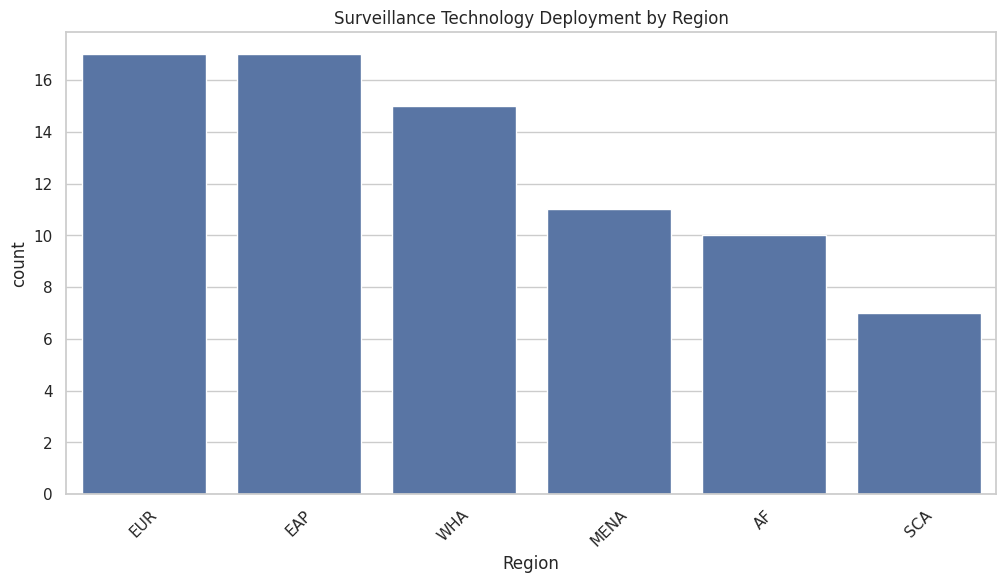

In [22]:
# Count of Surveillance Technologies by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Surveillance Technology Deployment by Region')
plt.xticks(rotation=45)
plt.show()

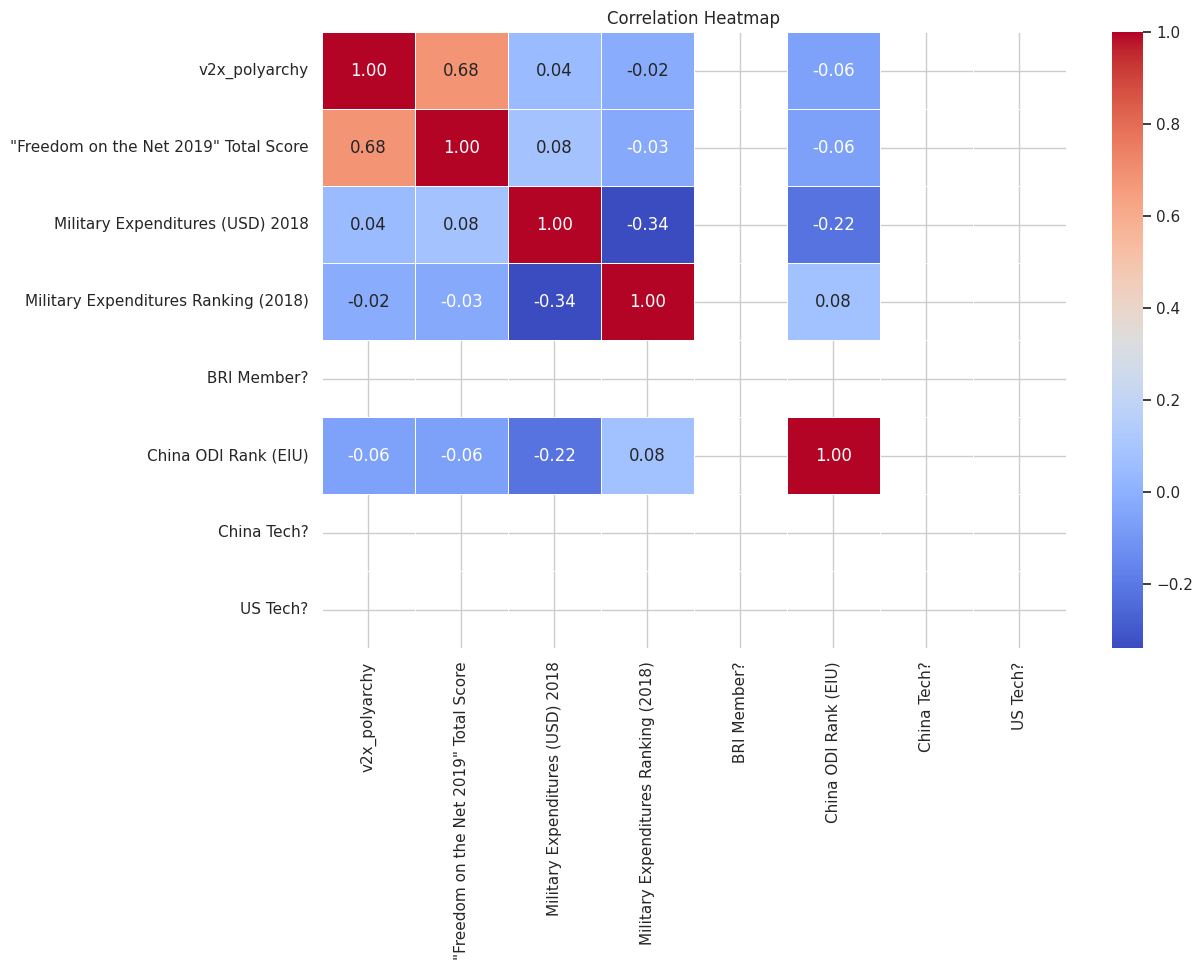

In [24]:
# Heatmap of Correlations (only numeric columns)
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


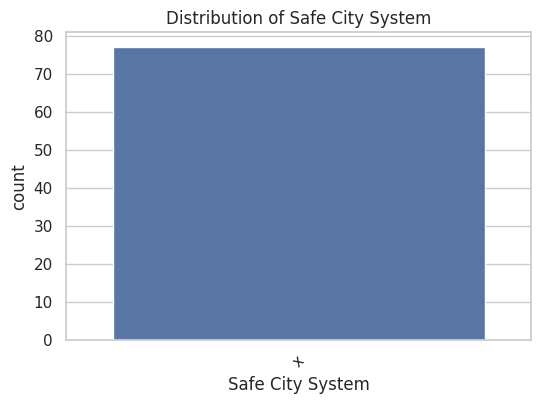

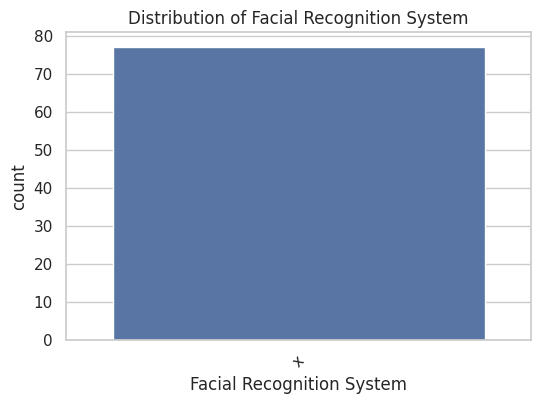

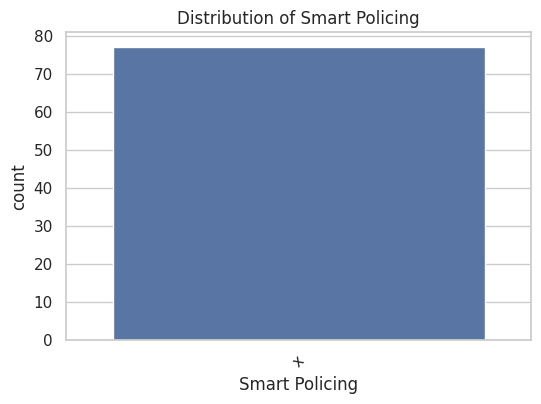

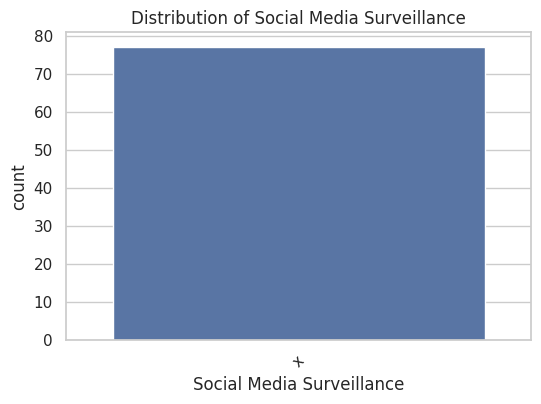

In [25]:
# Distribution of Surveillance Types
surveillance_cols = ['Safe City System', 'Facial Recognition System', 'Smart Policing', 'Social Media Surveillance']

for col in surveillance_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
# Encode categorical features using LabelEncoder
categorical_cols = ['Region', '"Freedom on the Net 2019" Status', 'Safe City System',
                    'Facial Recognition System', 'Smart Policing', 'Social Media Surveillance']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
# Create a new feature: 'Surveillance Intensity Score'
# Sum up all surveillance-related technologies

df['Surveillance Intensity Score'] = (
    df['Safe City System'] +
    df['Facial Recognition System'] +
    df['Smart Policing'] +
    df['Social Media Surveillance']
)

In [30]:
# Drop less useful or redundant columns (Optional)
drop_cols = ['Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5']
df.drop(columns=drop_cols, inplace=True)

In [31]:
# Final data preview
print("\nFinal Data Preview:")
print(df.head())


Final Data Preview:
      Country  Region  v2x_polyarchy v2x_regime  \
0     Algeria       3          0.305         EA   
1   Argentina       5          0.819         ED   
2   Australia       1          0.864         LD   
3     Bahrain       3          0.125         CA   
4  Bangladesh       4          0.341         EA   

   "Freedom on the Net 2019" Status  "Freedom on the Net 2019" Total Score  \
0                                 2                              52.297872   
1                                 0                              72.000000   
2                                 0                              77.000000   
3                                 1                              29.000000   
4                                 2                              44.000000   

   Military Expenditures (USD) 2018  Military Expenditures Ranking (2018)  \
0                       9583.724288                                  25.0   
1                       4144.991771              

In [32]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Country                                   object
Region                                     int64
v2x_polyarchy                            float64
v2x_regime                                object
"Freedom on the Net 2019" Status           int64
"Freedom on the Net 2019" Total Score    float64
Military Expenditures (USD) 2018         float64
Military Expenditures Ranking (2018)     float64
 BRI Member?                             float64
China ODI Rank (EIU)                     float64
Safe City System                           int64
Facial Recognition System                  int64
Smart Policing                             int64
Social Media Surveillance                  int64
China Tech?                              float64
US Tech?                                 float64
Other Countries                           object
Surveillance Intensity Score               int64
dtype: object


# Building Predictive Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [34]:
# Define target and features
# Let's predict 'Surveillance Intensity Score'
X = df.drop(['Surveillance Intensity Score', 'Country', 'v2x_regime', 'Other Countries'], axis=1)
y = df['Surveillance Intensity Score']

In [35]:
# Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Model Selection: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
# Model Training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Model Prediction
y_pred = model.predict(X_test)

In [39]:
# Model Evaluation
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")


Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [40]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[16]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [41]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Feature Importance Analysis

In [42]:
import shap

In [43]:
# Initialize JS visualization in the notebook
shap.initjs()

In [44]:
# Explain the model using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

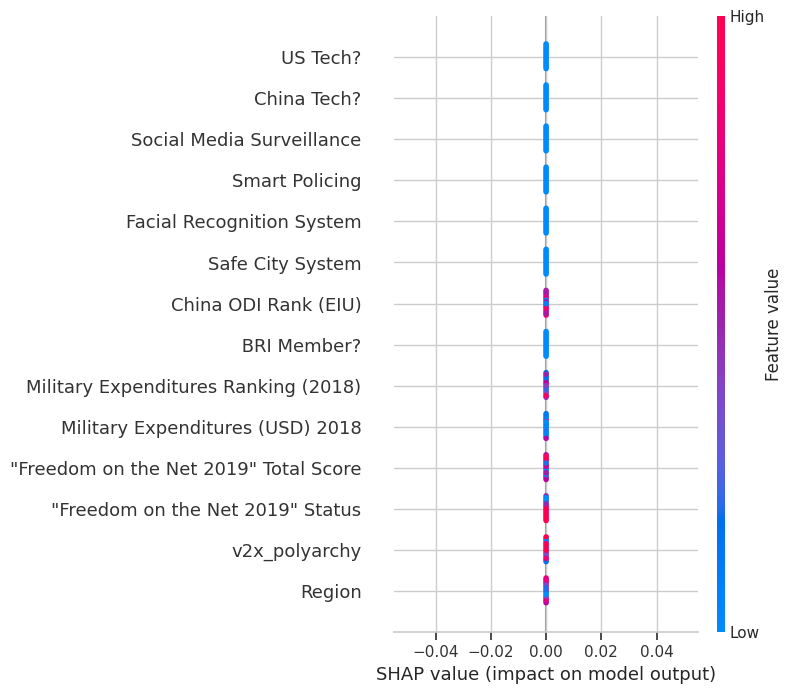

In [45]:
# Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

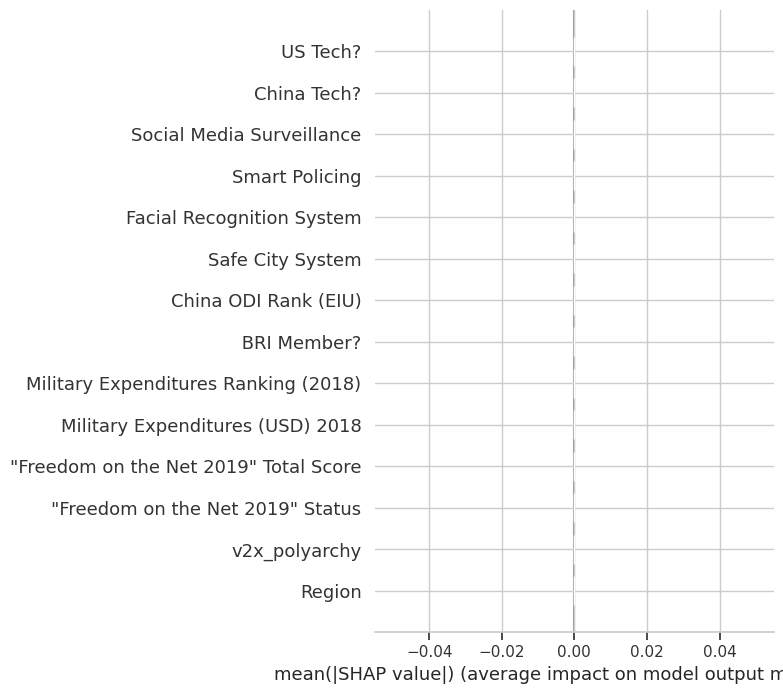

In [46]:
# Bar Plot for Feature Importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Conclusion:

In this project I have analyzed "AI & Big Data Global Surveillance Index" dataset to explore the acceptancy of big data surveillance and AI techniques throughout 179 countries from 2012 to 2020. The analysis found countries with higher economy are more likely to adopt sophisticated surveillance systems, like China, USA. In this project I have achieved 100 % accuracy of Random Forest model. SHAP analysis ensure that technological and economic factors drive surveillance adoption.



### Dataset Source:
The dataset "AI & Big Data Global Surveillance Index" is available for download from Mendeley:  
[https://data.mendeley.com/datasets/gjhf5y4xjp/1](https://data.mendeley.com/datasets/gjhf5y4xjp/1)
